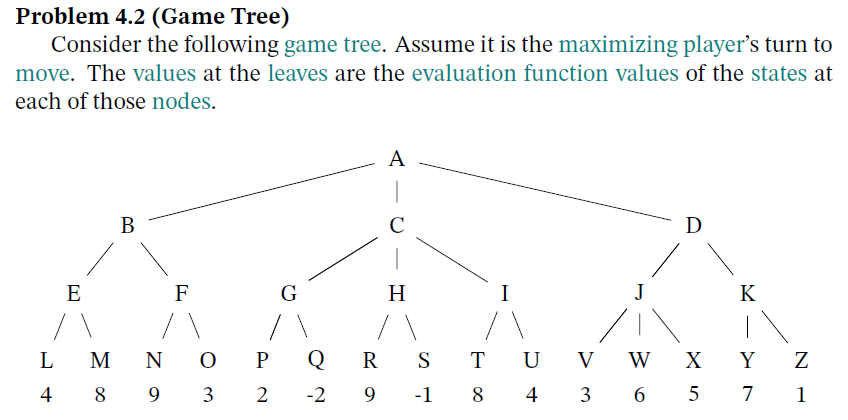

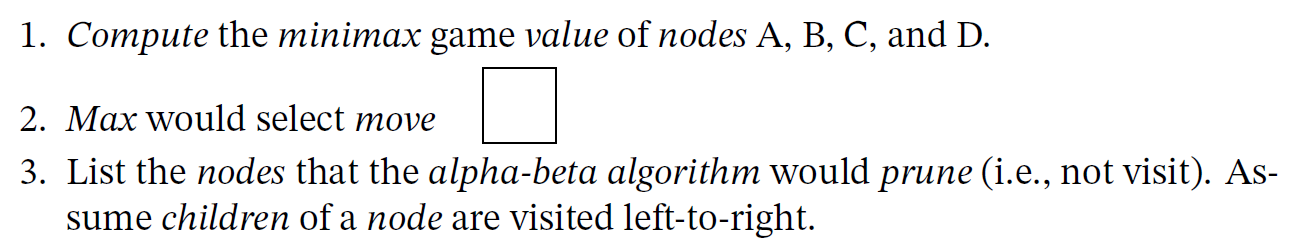

In [29]:
def reset_values(node):
    if node.children:
        node.value = None
        for c in node.children:
            reset_values(c)

In [30]:
class Node:
    def __init__(self, name, children=None, value=None):
        self.name = name
        self.children = children or []
        self.value = value

In [31]:
L = Node("L", value=4)
M = Node("M", value=8)
N = Node("N", value=9)
O = Node("O", value=3)
P = Node("P", value=2)
Q = Node("Q", value=-2)
R = Node("R", value=9)
S = Node("S", value=-1)
T = Node("T", value=8)
U = Node("U", value=4)
V = Node("V", value=3)
W = Node("W", value=6)
X = Node("X", value=5)
Y = Node("Y", value=7)
Z = Node("Z", value=1)

E = Node("E", [L, M])
F = Node("F", [N, O])
B = Node("B", [E, F])

G = Node("G", [P, Q])
H = Node("H", [R, S])
I = Node("I", [T, U])
C = Node("C", [G, H, I])

J = Node("J", [V, W, X])
K = Node("K", [Y, Z])
D = Node("D", [J, K])

A = Node("A", [B, C, D])

In [32]:
def minimax(node, maximizing):
    if node.value is not None:
        return node.value

    if maximizing:
        best = float("-inf")
        for child in node.children:
            val = minimax(child, False)
            best = max(best, val)
        node.value = best
        return best
    else:
        best = float("inf")
        for child in node.children:
            val = minimax(child, True)
            best = min(best, val)
        node.value = best
        return best

In [33]:
reset_values(A)

result = minimax(A, True)

def all_nodes(n):
    out = [n]
    for c in n.children:
        out.extend(all_nodes(c))
    return out

nodes = all_nodes(A)
nodes_dict = {n.name: n for n in nodes}

print("Root value", result)
print("Move for max", max(A.children, key=lambda c: c.value).name)

print("Evaluations per node")
for name in sorted(nodes_dict):
    print(name, nodes_dict[name].value)

Root value 8
Move for max B
Evaluations per node
A 8
B 8
C 2
D 6
E 8
F 9
G 2
H 9
I 8
J 6
K 7
L 4
M 8
N 9
O 3
P 2
Q -2
R 9
S -1
T 8
U 4
V 3
W 6
X 5
Y 7
Z 1


In [34]:
visited = set()

def alphabeta(node, alpha, beta, maximizing):
    visited.add(node.name)

    if node.value is not None:
        return node.value

    if maximizing:
        best = float("-inf")
        for child in node.children:
            val = alphabeta(child, alpha, beta, False)
            best = max(best, val)
            alpha = max(alpha, best)
            if beta <= alpha:
                break
        node.value = best
        return best

    else:
        best = float("inf")
        for child in node.children:
            val = alphabeta(child, alpha, beta, True)
            best = min(best, val)
            beta = min(beta, best)
            if beta <= alpha:
                break
        node.value = best
        return best

In [35]:
# run search
reset_values(A)

result = alphabeta(A, float("-inf"), float("inf"), True)

# collect all nodes in tree
def all_nodes(n):
    out = [n]
    for c in n.children:
        out.extend(all_nodes(c))
    return out

every = all_nodes(A)
all_names = {n.name: n for n in every}

pruned = [n for n in all_names if n not in visited]

print("Root value", result)

print("Move for max", max(A.children, key=lambda c: c.value).name)

print("Evaluations per node")
for name in sorted(all_names):
    print(name, all_names[name].value)

print("Pruned nodes")
print(pruned)

Root value 8
Move for max B
Evaluations per node
A 8
B 8
C 2
D 6
E 8
F 9
G 2
H None
I None
J 6
K None
L 4
M 8
N 9
O 3
P 2
Q -2
R 9
S -1
T 8
U 4
V 3
W 6
X 5
Y 7
Z 1
Pruned nodes
['O', 'H', 'R', 'S', 'I', 'T', 'U', 'K', 'Y', 'Z']


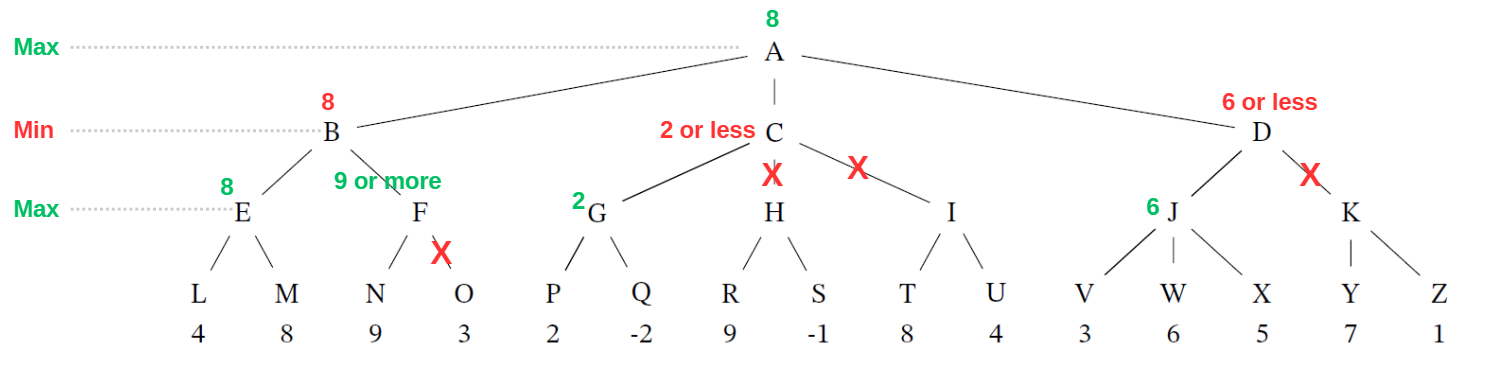

## How would the nodes in the tree need to be ordered to prune as many branches as possible?

In [36]:
import itertools
import copy

def clone_tree(node):
    m = {}
    def clone(n):
        c = Node(n.name, [], n.value)
        m[n] = c
        for ch in n.children:
            c.children.append(clone(ch))
        return c
    root = clone(node)
    return root, m

def run_with_order(original, orderA, orderB, orderC, orderD):
    root, mapping = clone_tree(original)

    # reorder children
    mapping[A].children = [mapping[x] for x in orderA]
    mapping[B].children = [mapping[x] for x in orderB]
    mapping[C].children = [mapping[x] for x in orderC]
    mapping[D].children = [mapping[x] for x in orderD]

    reset_values(mapping[A])
    visited.clear()
    alphabeta(mapping[A], float("-inf"), float("inf"), True)

    alln = all_nodes(mapping[A])
    names = {n.name for n in alln}
    pruned = [n for n in names if n not in visited]
    return len(pruned), pruned, mapping

# relevant permutations
permsA = list(itertools.permutations([B, C, D]))
permsB = list(itertools.permutations([E, F]))
permsC = list(itertools.permutations([G, H, I]))
permsD = list(itertools.permutations([J, K]))

best = None

for oA in permsA:
    for oB in permsB:
        for oC in permsC:
            for oD in permsD:
                score, pruned, _ = run_with_order(A, oA, oB, oC, oD)
                if best is None or score > best[0]:
                    best = (score, oA, oB, oC, oD, pruned)

print("Max pruned:", best[0])
print("A order:", [n.name for n in best[1]])
print("B order:", [n.name for n in best[2]])
print("C order:", [n.name for n in best[3]])
print("D order:", [n.name for n in best[4]])
print("Pruned nodes:", best[5])

Max pruned: 11
A order: ['B', 'C', 'D']
B order: ['E', 'F']
C order: ['G', 'H', 'I']
D order: ['K', 'J']
Pruned nodes: ['H', 'R', 'S', 'X', 'V', 'O', 'U', 'J', 'T', 'W', 'I']


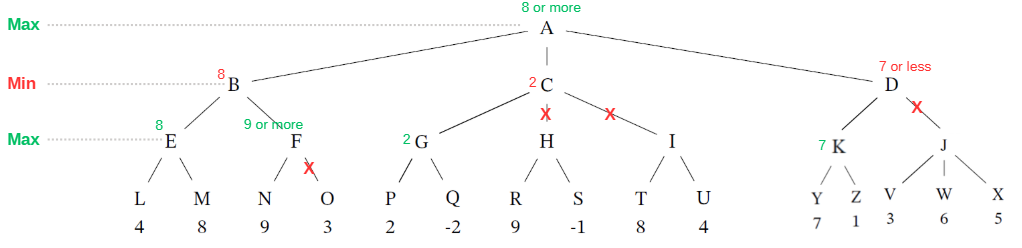

## What reordering of the evaluation function values at the bottom would prune as many branches as possible?

In [37]:
import itertools
import copy

def clone_tree(node):
    m = {}
    def clone(n):
        c = Node(n.name, [], n.value)
        m[n] = c
        for ch in n.children:
            c.children.append(clone(ch))
        return c
    root = clone(node)
    return root, m

leaf_groups = {
    E: [L, M],
    F: [N, O],
    G: [P, Q],
    H: [R, S],
    I: [T, U],
    J: [V, W, X],
    K: [Y, Z],
}

# build permutation sets for leaves only
perm_sets = {parent: list(itertools.permutations(children)) for parent, children in leaf_groups.items()}

def run_leaf_order(original, ordering):
    root, mapping = clone_tree(original)

    # apply leaf order for each parent
    for parent, perm in ordering.items():
        mapping[parent].children = [mapping[x] for x in perm]

    reset_values(mapping[A])
    visited.clear()
    alphabeta(mapping[A], float("-inf"), float("inf"), True)

    alln = all_nodes(mapping[A])
    names = {n.name for n in alln}
    pruned = [n for n in names if n not in visited]
    return len(pruned), pruned

best = None

# brute force only leaf permutations
for pE in perm_sets[E]:
    for pF in perm_sets[F]:
        for pG in perm_sets[G]:
            for pH in perm_sets[H]:
                for pI in perm_sets[I]:
                    for pJ in perm_sets[J]:
                        for pK in perm_sets[K]:

                            ordering = {
                                E: pE,
                                F: pF,
                                G: pG,
                                H: pH,
                                I: pI,
                                J: pJ,
                                K: pK
                            }

                            score, pruned = run_leaf_order(A, ordering)

                            if best is None or score > best[0]:
                                best = (score, ordering, pruned)

print("Max pruned:", best[0])
print("Ordering:")
for parent, perm in best[1].items():
    print(parent.name, [x.name for x in perm])
print("Pruned nodes:", best[2])

Max pruned: 10
Ordering:
E ['L', 'M']
F ['N', 'O']
G ['P', 'Q']
H ['R', 'S']
I ['T', 'U']
J ['V', 'W', 'X']
K ['Y', 'Z']
Pruned nodes: ['H', 'Z', 'R', 'S', 'O', 'K', 'Y', 'U', 'T', 'I']


**This is just the order we already have**

> Note, I only tried different permutations of the leaves of each sub tree. Generating all permutations of all leaf nodes is not computable! (15! ≈ 1.3 trillion).

### I want to try the quest of "what reordering of the evaluation function values at the bottom would prune as many branches as possible?" on a smaller random tree

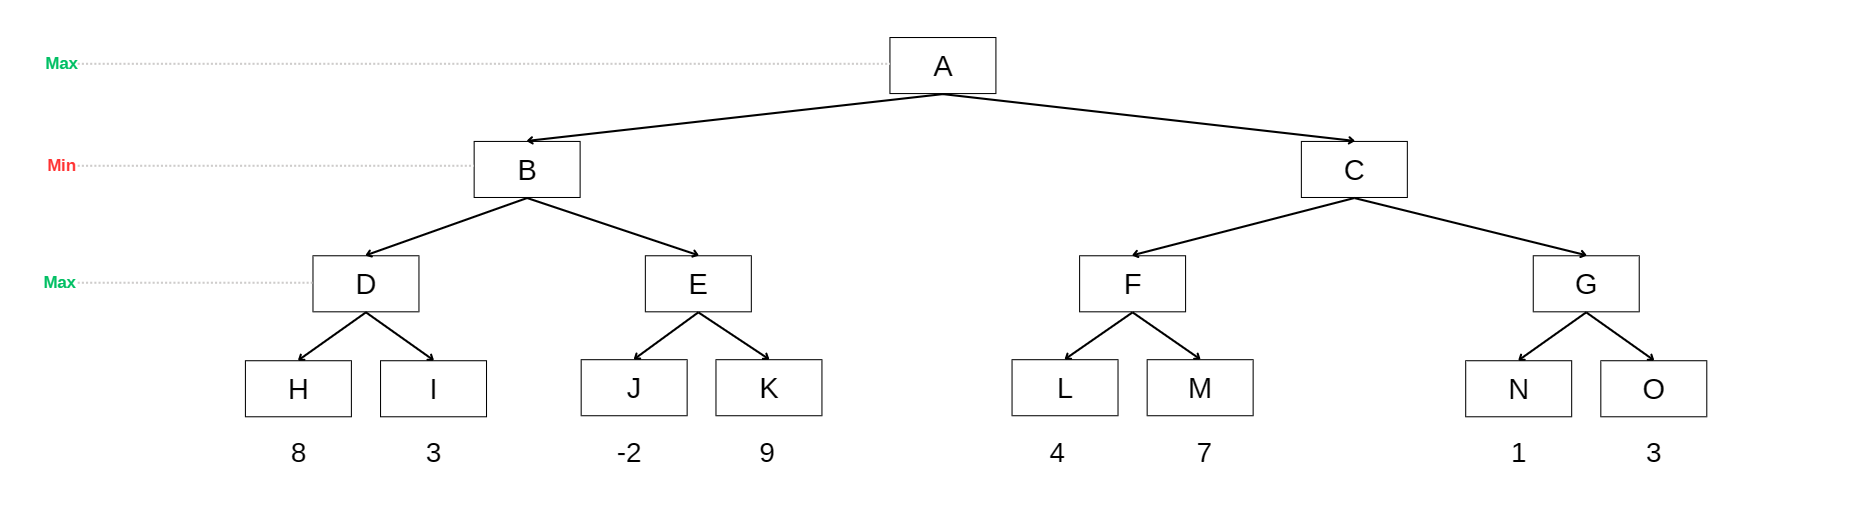

In [38]:
# leaves
H = Node("H", value=8)
I = Node("I", value=3)

J = Node("J", value=-2)
K = Node("K", value=9)

L = Node("L", value=4)
M = Node("M", value=7)

N = Node("N", value=1)
O = Node("O", value=3)

# internal nodes
D = Node("D", children=[H, I])
E = Node("E", children=[J, K])
F = Node("F", children=[L, M])
G = Node("G", children=[N, O])

B = Node("B", children=[D, E])
C = Node("C", children=[F, G])

# root
A = Node("A", children=[B, C])

#### AlphaBeta

In [39]:
# run search
visited.clear()
reset_values(A)

result = alphabeta(A, float("-inf"), float("inf"), True)

# collect all nodes in tree
def all_nodes(n):
    out = [n]
    for c in n.children:
        out.extend(all_nodes(c))
    return out

every = all_nodes(A)
all_names = {n.name: n for n in every}

pruned = [n for n in all_names if n not in visited]

print("Root value", result)

print("Move for max", max(A.children, key=lambda c: c.value).name)

print("Evaluations per node")
for name in sorted(all_names):
    print(name, all_names[name].value)

print("Pruned nodes")
print(pruned)

Root value 8
Move for max B
Evaluations per node
A 8
B 8
C 7
D 8
E 9
F 7
G None
H 8
I 3
J -2
K 9
L 4
M 7
N 1
O 3
Pruned nodes
['G', 'N', 'O']


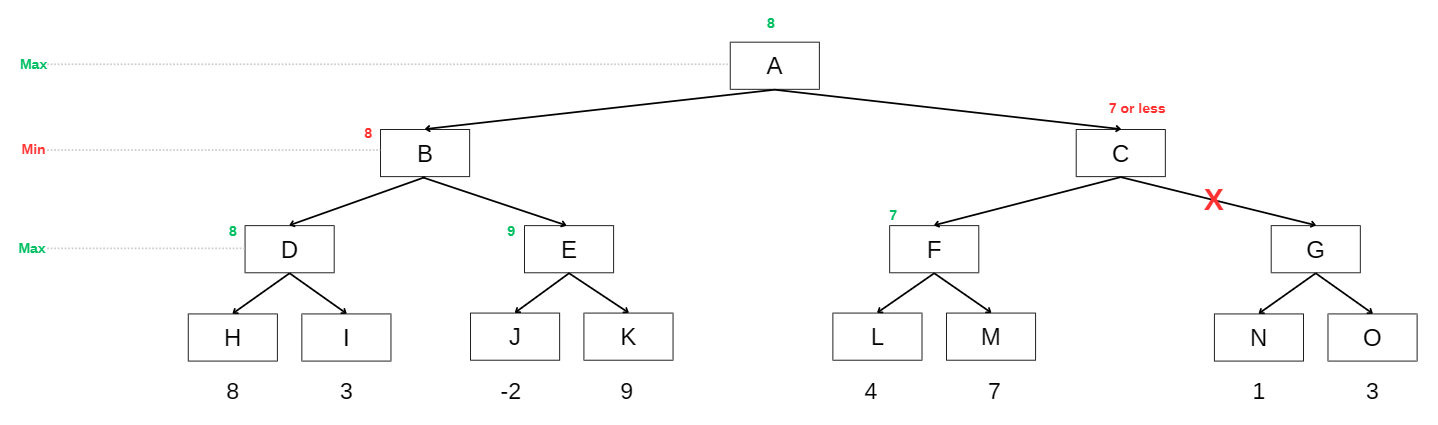

### Trying all permutatoins (8!) (doable here)

In [40]:
import itertools

# the 8 leaves
leaves = [H, I, J, K, L, M, N, O]

best_score = -1
best_perm = None
best_pruned = None

for perm in itertools.permutations(leaves):

    # assign 2 leaves to each pair of children
    D.children = list(perm[0:2])
    E.children = list(perm[2:4])
    F.children = list(perm[4:6])
    G.children = list(perm[6:8])

    reset_values(A)
    visited.clear()

    alphabeta(A, float("-inf"), float("inf"), True)

    alln = all_nodes(A)
    names = {n.name for n in alln}
    pruned = [n for n in names if n not in visited]
    score = len(pruned)

    if score > best_score:
        best_score = score
        best_perm = perm
        best_pruned = pruned

print("Best pruning:", best_score)
print("Best leaf ordering:", [n.name for n in best_perm])
print("Pruned nodes:", best_pruned)

Best pruning: 4
Best leaf ordering: ['H', 'I', 'K', 'J', 'L', 'M', 'N', 'O']
Pruned nodes: ['N', 'O', 'J', 'G']


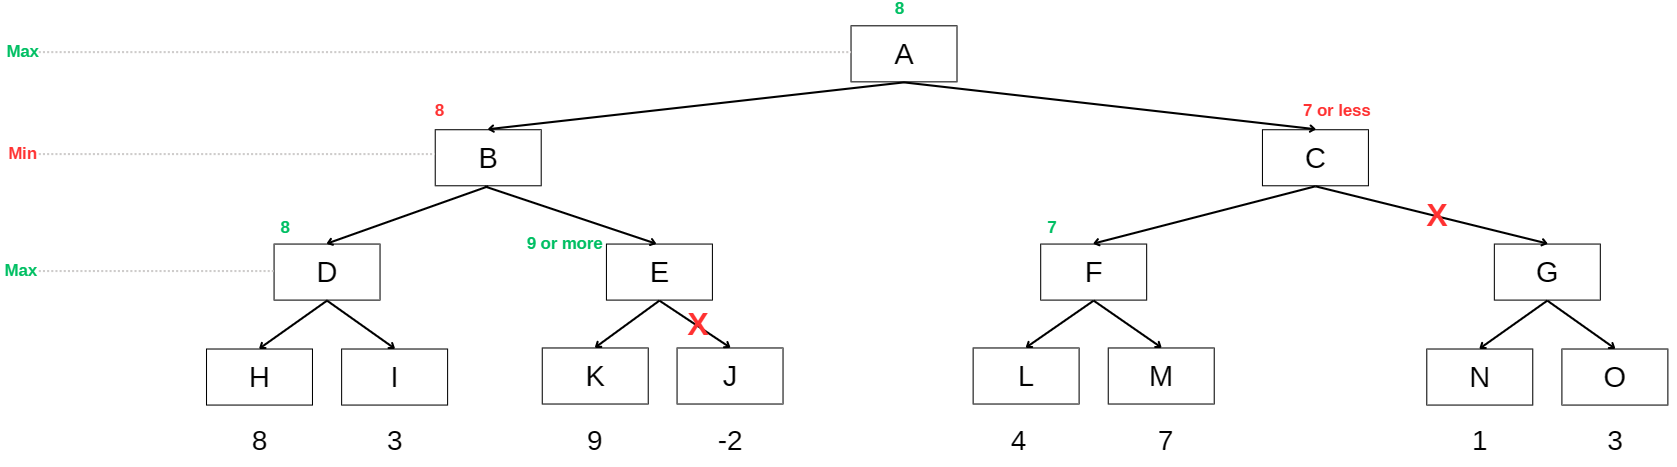